In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import syft as sy

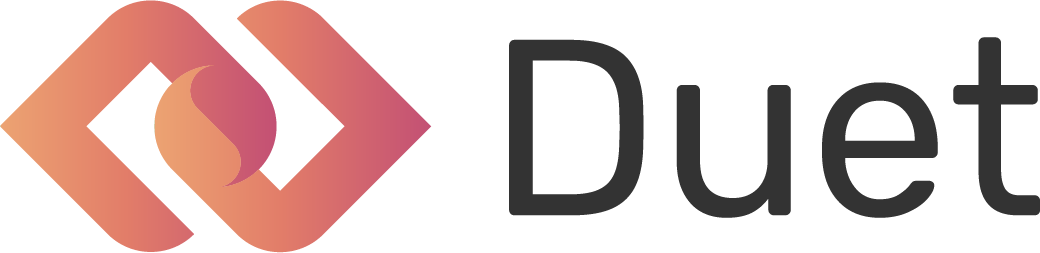

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!



In [2]:
duet = sy.duet(loopback=True)

In [3]:
def split_data(dataset, worker_list=None, n_workers=2):

    if worker_list is None:
        worker_list = list(range(0, n_workers))
            
    #counter to create the index of different data samples
    idx = 0 
    
    #dictionary to accomodate the split data
    dic_single_datasets = {}
    for worker in worker_list: 
        """
        Each value is a list of three elements, to accomodate, in order: 
        - data examples (as tensors)
        - label
        - index 
        """
        dic_single_datasets[worker] = [] 

    """
    Loop through the dataset to split the data and labels vertically across workers. 
    Splitting method from @abbas5253: https://github.com/abbas5253/SplitNN-for-Vertically-Partitioned-Data/blob/master/distribute_data.py
    """
    label_list = []
    index_list = []
    for tensor, label in dataset:
        height = tensor.shape[-1]//len(worker_list)
        i = 0
        for worker in worker_list[:-1]: 
            dic_single_datasets[worker].append(tensor[:, :, height * i : height * (i + 1)])
            i += 1
            
        #add the value of the last worker / split
        dic_single_datasets[worker_list[-1]].append(tensor[:, :, height * (i) : ])
        label_list.append(torch.Tensor([label]))
        index_list.append(torch.Tensor([idx]))
        
        idx += 1
        
    return dic_single_datasets, label_list, index_list

In [4]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('mnist', download=True, train=False, transform=transform)

In [5]:
img, _, _ = split_data(trainset)
img = torch.cat(img[1][:10_000])
img_rshp = img.view(img.shape[0], -1)

In [6]:
print(img_rshp.shape)

torch.Size([10000, 392])


In [7]:
val_img, _, _ = split_data(valset)
val_img = torch.cat(val_img[1][:5_000])
val_img_rshp = val_img.view(val_img.shape[0], -1)
print(val_img_rshp.shape)

torch.Size([5000, 392])


In [8]:
img_rshp.send(duet, searchable=True, tags=["flatten"], description="flattened")
val_img_rshp.send(duet, searchable=True, tags=["flatten_val"], description="flattened validation data")

In [9]:
duet.requests.add_handler(action="accept", tags=[""])

[2021-03-22T10:02:13.637026+0000][CRITICAL][logger]][62309] You are not Authorized to access this service
[2021-03-22T10:02:13.637389+0000][CRITICAL][logger]][62309] You are not Authorized to access this service
[2021-03-22T10:02:13.637522+0000][CRITICAL][logger]][62309] You are not Authorized to access this service
Exception in callback AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55
handle: <Handle AsyncIOEventEmitter._emit_run.<locals>._callback(<Task finishe...his service')>) at /Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py:55>
Traceback (most recent call last):
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/nest_asyncio.py", line 199, in run
    ctx.run(self._callback, *self._args)
  File "/Users/adamhall/anaconda3/envs/pysyft/lib/python3.8/site-packages/pyee/_asyncio.py", line 62, in _callback
   

[2021-03-22T10:08:05.704030+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 77664d0a8f3c4f80adf5aa130fa2c47e>.
[2021-03-22T10:08:07.989349+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3a210252b83c4c73bbb9c444abb97e7d>.
[2021-03-22T10:08:09.289676+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bd95e74c524240a385f455a736d18239>.
[2021-03-22T10:08:10.585522+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9dc9b84310714ae8938648db76761828>.
[2021-03-22T10:08:11.885481+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: bf967100a8274622868ddfafdf0a2294>.
[2021-03-22T10:08:13.184341+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 4ffd4e7f03c1426

[2021-03-22T10:09:39.098049+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 81580a19513642a9b63e65f4d039dc72>.
[2021-03-22T10:09:41.374597+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 68a5a1e19dbd4619ae2f1d425762838e>.
[2021-03-22T10:09:43.651242+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 557960c166ce4753bf51b34102c83ea3>.
[2021-03-22T10:09:48.176173+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f432c7b3c825484db5dc6b4152f6078d>.
[2021-03-22T10:09:50.438820+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 309a153ad85349629b648250fd9e8857>.
[2021-03-22T10:09:52.712778+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e2ed03d48ad1468

[2021-03-22T10:11:23.220245+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 3efb4874e7324c8d9ad2ed0540939450>.
[2021-03-22T10:11:24.526547+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: d36a5ecbf5be4ccc989cc7e29a84f18e>.
[2021-03-22T10:11:25.832372+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6d91b1190cdd413f9edabbf16bf3568f>.
[2021-03-22T10:11:28.124694+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 65ca4768432d4046949eb293ab48fa22>.
[2021-03-22T10:11:30.435127+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 9bdfa338638f4d4da17a8b1efb6cdfbe>.
[2021-03-22T10:11:31.737755+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2a91aa39080b4d0

[2021-03-22T10:12:51.565291+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 613176f670e349ddaa7a00d34f4840c5>.
[2021-03-22T10:12:53.857467+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea547500805a40e398a66d8de0527069>.
[2021-03-22T10:12:55.173658+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2e41f547290c4bfa8d746fb5d182fe56>.
[2021-03-22T10:12:56.489427+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8a90e794e9bf4d0b9b3bf970ac935a34>.
[2021-03-22T10:12:58.785637+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ee069318f4f147ec98c54f5cae677765>.
[2021-03-22T10:13:01.097940+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 5d1476b66e56486

[2021-03-22T10:14:34.910026+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6809af0f1d004b3eae7d3b8a36284894>.
[2021-03-22T10:14:37.186442+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ddb5a5a3837e4ad3a2be00eb26ed3f2b>.
[2021-03-22T10:14:39.459919+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 1046196460074797913ff8a95e58cc0f>.
[2021-03-22T10:14:41.728451+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 31b21899d65c44ff84c58d3368ed6a32>.
[2021-03-22T10:14:44.002499+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cc26082b6a174b41a473396ee4908de6>.
[2021-03-22T10:14:46.270171+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: ea1c395c3dc0418

[2021-03-22T10:16:14.082584+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 25abb18937d54953b2c7eaad66b7b305>.
[2021-03-22T10:16:15.375683+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8dae1042d64548b3ac37fc4a190c8c15>.
[2021-03-22T10:16:17.642284+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 6e7d37ce7b1347abb43f308576be4950>.
[2021-03-22T10:16:19.910296+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: c427135e30a349c7be67ed607dc9b012>.
[2021-03-22T10:16:20.224585+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: b215f26cddce4d068f7f95fc671b24cc>.
[2021-03-22T10:16:22.496533+0000][CRITICAL][logger]][62309] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 8ee83787d4304c2